In [1]:
! pip -q install optax

     |████████████████████████████████| 140 kB 5.2 MB/s 
     |████████████████████████████████| 72 kB 330 kB/s 


In [2]:
import matplotlib.pyplot as plt
import jax.numpy as jnp
from jax import random

%config InlineBackend.figure_format='retina'

In [4]:
! git init .
! git remote add origin https://github.com/VLSF/SNO
! git pull origin main

Initialized empty Git repository in /content/.git/
remote: Enumerating objects: 36, done.
remote: Counting objects: 100% (36/36), done.
remote: Compressing objects: 100% (18/18), done.
remote: Total 36 (delta 18), reused 32 (delta 17), pack-reused 0
Unpacking objects: 100% (36/36), done.
From https://github.com/VLSF/SNO
 * branch            main       -> FETCH_HEAD
 * [new branch]      main       -> origin/main


In [5]:
from datasets import Derivatives
from functions import utils

Derivatives for 1D benchmarks

In [6]:
N_points = 50

data = Derivatives.Fourier_series(5, N_points, 5, key=random.PRNGKey(13), periodic=True, return_coefficients=False)
x = utils.grid(N_points, periodic=True)

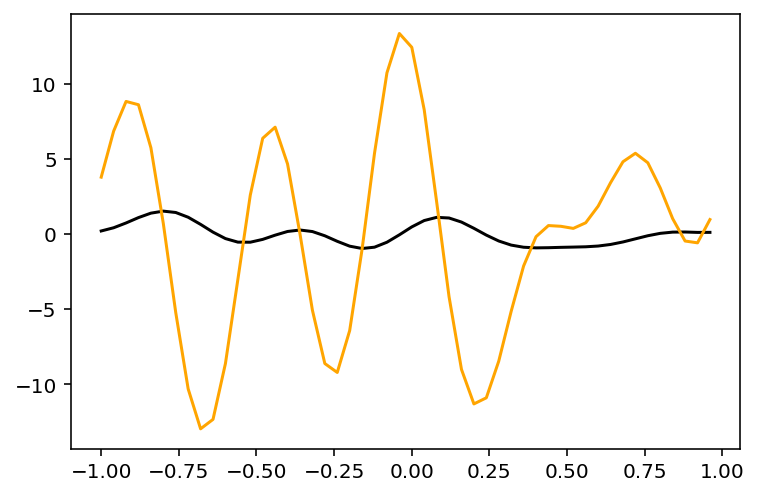

In [7]:
plt.plot(x, data[0][0], color="black")
plt.plot(x, data[1][0], color="orange");

$L_2$ norm $=1$

In [8]:
jnp.linalg.norm(data[0][0])*(x[1] - x[0])**(1/2)

DeviceArray(1., dtype=float64)

Numerical check that we perform differentiation

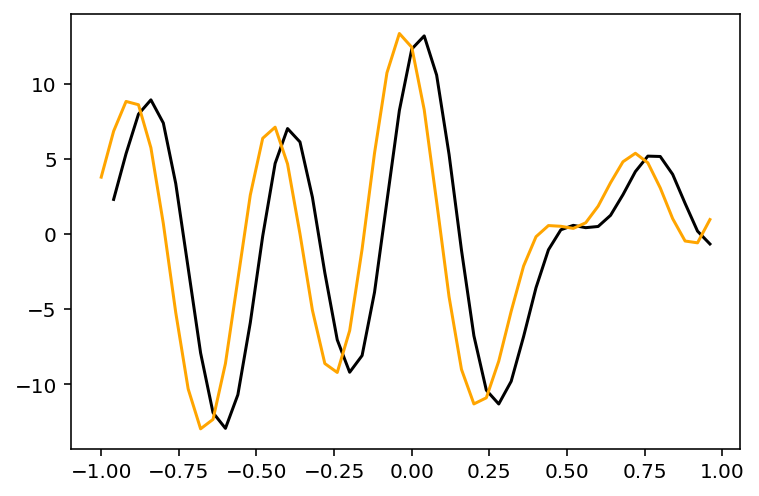

In [11]:
h = x[1] - x[0]
diff_f = [(data[0][0][i] - data[0][0][i-1])/h for i in range(len(data[0][0])-1)]

plt.plot(x[1:], diff_f, color="black")
plt.plot(x, data[1][0], color="orange");

Can also evaluate the same function on the Chebyshev grid

In [12]:
N_points = 50

data = Derivatives.Fourier_series(10, N_points, 5, key=random.PRNGKey(13), periodic=False, shift=20, return_coefficients=False)
x = utils.grid(N_points, periodic=False)

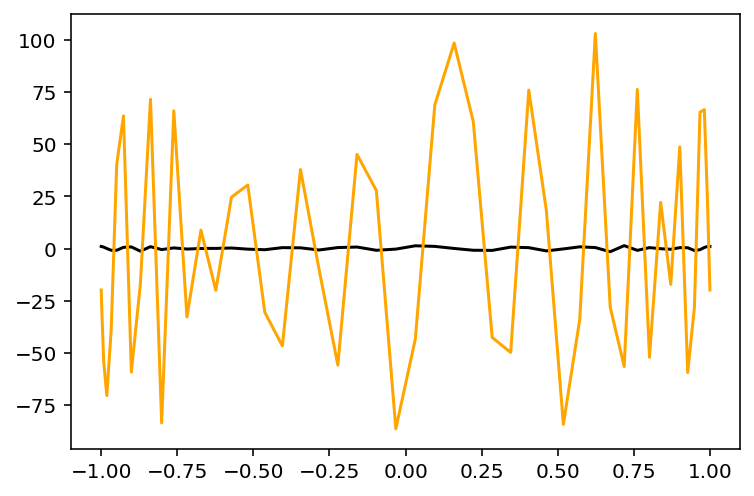

In [13]:
plt.plot(x, data[0][0], color="black")
plt.plot(x, data[1][0], color="orange");

And in the space of coefficients.

In [14]:
N_points = 100

data = Derivatives.Fourier_series(10, N_points, 5, key=random.PRNGKey(13), shift=15, periodic=False, return_coefficients=True)

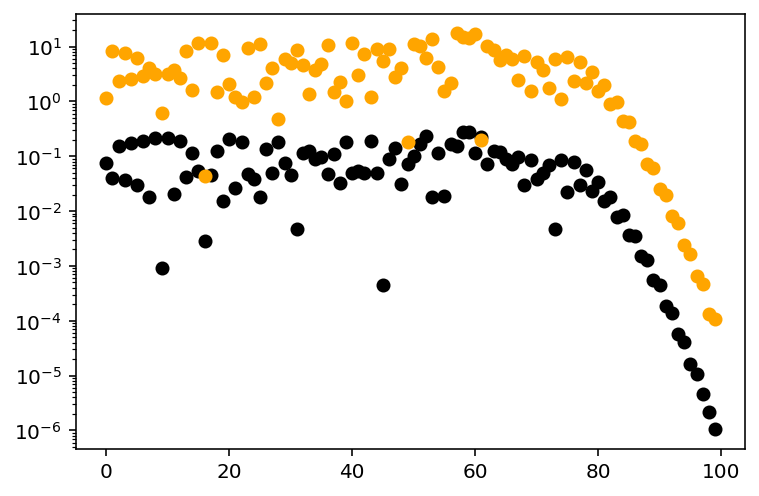

In [15]:
plt.yscale("log")
plt.plot(abs(data[0][0]), "o", color="black")
plt.plot(abs(data[1][0]), "o", color="orange");

In [16]:
N_points = 100

data = Derivatives.Fourier_series(10, N_points, 5, key=random.PRNGKey(13), shift=20, periodic=True, return_coefficients=True)

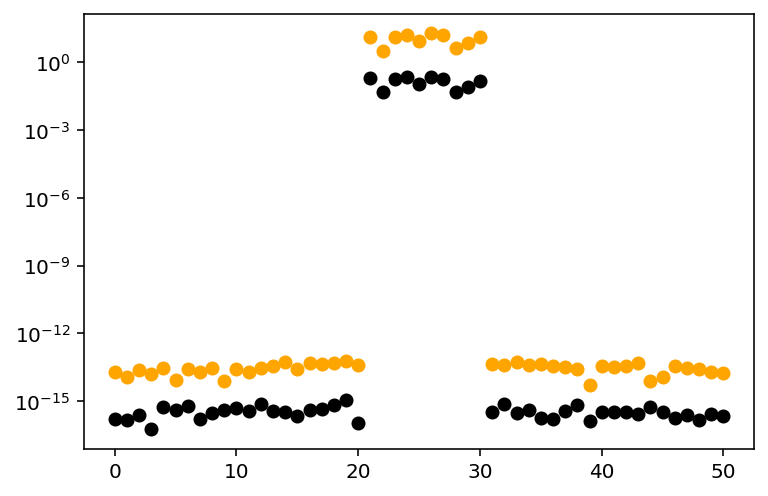

In [17]:
plt.yscale("log")
plt.plot(abs(data[0][0]), "o", color="black")
plt.plot(abs(data[1][0]), "o", color="orange");